<a href="https://colab.research.google.com/github/hsuemily/CE888_Hsu-Chi-Rou_1900759/blob/master/Assignment/Dataset1_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Library

In [0]:
# Import library
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

## 2.  Load Dataset

In [260]:
# Load data
# Colab library to upload files to notebook, Ref:https://medium.com/@saedhussain/google-colaboratory-and-kaggle-datasets-b57a83eb6ef8
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

# Load data from Kaggle to Google Colab virtual machine
os.environ['KAGGLE_USERNAME'] = "emilyhsucr" # username from the json file
os.environ['KAGGLE_KEY'] = "3b6aa5aa02b468c89e4cfac52a5d992e" # key from the json file
!kaggle competitions download -c porto-seguro-safe-driver-prediction # api copied from kaggle

test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
# Titanic
Titanic = pd.read_csv("https://raw.githubusercontent.com/hsuemily/CE888_Hsu-Chi-Rou_1900759/master/Assignment/titanic_train.csv", delimiter = ",")


In [262]:
Titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [263]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 3. Data Visualization

Not Survival: 549
Survival: 342
Imbalance rate: 61.62 %


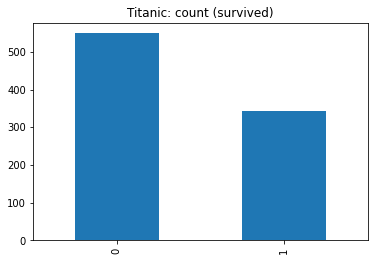

In [264]:
# Plot histogram of the label Survived in Titanic dataset
# Ref: https://stackoverflow.com/questions/28418988/how-to-make-a-histogram-from-a-list-of-strings-in-python
# Ref: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
pd.Series(Titanic['Survived']).value_counts().plot(kind='bar',title='Titanic: count (survived)')
target_count = Titanic.Survived.value_counts()
print('Not Survival:', target_count[0])
print('Survival:', target_count[1])
print('Imbalance rate:', round((target_count[0] / (target_count[0]+target_count[1]))*100, 2), '%')

## 4. Data Preprocessing
 - 4.1 Missing Value
 - 4.2 Normalization
 - 4.3 Lable encoding or one hot encoding

### 4.1 Missing Value

In [265]:
# dealing with missing value

#*****Titanic
total = Titanic.isnull().sum().sort_values(ascending=False)
# summarize the amount of missing value in each attributes, and then sort it by descending order
# percent = the counts of missing value /the counts of item (in each attribute)
percent = (Titanic.isnull().sum()/Titanic.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head()

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

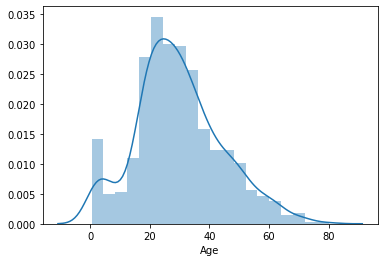

In [266]:
sns.distplot(Titanic['Age'])
Titanic['Age'].describe()

In [0]:
# median
Titanic_copy = Titanic.copy() # copy: copy the original data in order to keep the original data 
Titanic_copy.loc[Titanic_copy['Age'].isnull(),'Age']=Titanic_copy['Age'].mean(skipna=True)

In [0]:
#dealing with missing data
# fill them into none
cols1 = ["Cabin"]
for col in cols1:
    Titanic_copy[col].fillna("None", inplace=True)

In [0]:
# drop the missing value in "Embarked" column
Titanic_copy=Titanic_copy.dropna()

In [270]:
#*****Titanic- check for the missing dataset again
total = Titanic_copy.isnull().sum().sort_values(ascending=False)
percent = (Titanic_copy.isnull().sum()/Titanic_copy.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head()

,Total,Percent
Embarked,0,0.0
Cabin,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0


### 4.2 Normalization

In [271]:
# Normalize dataset - Titanic
for col in Titanic_copy.select_dtypes(include='number').columns:
    mms = MinMaxScaler()
    Titanic_copy[col] = mms.fit_transform(Titanic_copy[[col]])
Titanic_copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.500000,0.382452,0.655793,0.367347,0.065523,0.063742,0.062649
std,0.288762,0.486260,0.417350,0.162960,0.137963,0.134460,0.097003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250562,0.000000,0.500000,0.271174,0.000000,0.000000,0.015412
50%,0.500000,0.000000,1.000000,0.367921,0.000000,0.000000,0.028213
75%,0.749438,1.000000,1.000000,0.434531,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4.3 Lable encoding or one hot encoding

In [272]:
Titanic_X = Titanic_copy.drop('Survived', axis = 1)
Titanic_Y = np.array(Titanic_copy['Survived'])
# Using one hot encoding in Titanic and Adult dataset
# Ref: https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/
# creating one hot encoder object by default 
# entire data passed is one hot encoded 

Encoder = OneHotEncoder()
Titanic_X = Encoder.fit_transform(Titanic_X).toarray()

# from sklearn.preprocessing import LabelEncoder
# for col in Titanic_X.select_dtypes(include='object').columns:
#     le = LabelEncoder()
#     Titanic_X[col] = le.fit_transform(Titanic_X[col].astype('str'))
# Titanic_X=Titanic_X.values


print("Titanic:",Titanic_X)
print(Titanic_X.shape)
print(Titanic_Y.shape)

Titanic: [[1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(889, 2963)
(889,)


## 5. Supervised Learning
### 5.1 Decision tree (cross-validation)
### 5.2 Random forest (cross-validation)

In [0]:
# ## Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#

# import numpy as np
# from sklearn.model_selection import StratifiedKFold
# # X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])
# # y = np.array([0, 0, 0, 1, 1, 1])
# skf = StratifiedKFold(n_splits=10)
# skf.get_n_splits(Titanic_X, Titanic_Y)


In [0]:
# print(skf)

In [0]:
# for train_index, test_index in skf.split(Titanic_X, Titanic_Y):
#   print("TRAIN:", train_index, "TEST:", test_index)
#   X_train, X_test = Titanic_X[train_index], Titanic_X[test_index]
#   y_train, y_test = Titanic_Y[train_index], Titanic_Y[test_index]

In [275]:
## Decision tree 

## Ref: https://www.kaggle.com/sudhirnl7/logistic-regression-with-stratifiedkfold
## Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#
#Import library
from sklearn import tree
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import StratifiedKFold

Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)
pred_test_full =0
cv_scoreDT =[]
i=1
for train_index,test_index in Skf.split(Titanic_X,Titanic_Y):
    print('{} of KFold {}'.format(i,Skf.n_splits))
    x_tr,x_v = Titanic_X[train_index],Titanic_X[test_index]
    y_tr,y_v = Titanic_Y[train_index],Titanic_Y[test_index]
    
    #model
    modelDT = tree.DecisionTreeClassifier(criterion = "entropy",random_state=1)
    # model = tree.DecisionTreeClassifier(max_depth=5,max_leaf_nodes=15, max_features=14, criterion = "entropy",random_state=1)
    modelDT.fit(x_tr,y_tr)
    scoreDT = roc_auc_score(y_v,modelDT.predict(x_v))
    print('ROC AUC score:',scoreDT)
    cv_scoreDT.append(scoreDT)
    print('Confusion matrix\n',confusion_matrix(y_v,modelDT.predict(x_v))) 
    i+=1 

1 of KFold 10
ROC AUC score: 0.7283422459893047
Confusion matrix
 [[51  4]
 [16 18]]
2 of KFold 10
ROC AUC score: 0.8754010695187165
Confusion matrix
 [[51  4]
 [ 6 28]]
3 of KFold 10
ROC AUC score: 0.8312834224598931
Confusion matrix
 [[51  4]
 [ 9 25]]
4 of KFold 10
ROC AUC score: 0.822192513368984
Confusion matrix
 [[50  5]
 [ 9 25]]
5 of KFold 10
ROC AUC score: 0.6521390374331552
Confusion matrix
 [[41 14]
 [15 19]]
6 of KFold 10
ROC AUC score: 0.7655080213903743
Confusion matrix
 [[47  8]
 [11 23]]
7 of KFold 10
ROC AUC score: 0.7836898395721925
Confusion matrix
 [[49  6]
 [11 23]]
8 of KFold 10
ROC AUC score: 0.8096256684491978
Confusion matrix
 [[47  8]
 [ 8 26]]
9 of KFold 10
ROC AUC score: 0.7157754010695188
Confusion matrix
 [[48  7]
 [15 19]]
10 of KFold 10
ROC AUC score: 0.769607843137255
Confusion matrix
 [[45  9]
 [10 24]]


In [276]:
print('Cv',cv_scoreDT,'\nMean cv Score',np.mean(cv_scoreDT))

Cv [0.7283422459893047, 0.8754010695187165, 0.8312834224598931, 0.822192513368984, 0.6521390374331552, 0.7655080213903743, 0.7836898395721925, 0.8096256684491978, 0.7157754010695188, 0.769607843137255] 
Mean cv Score 0.7753565062388591


In [277]:
## Random forest
from sklearn.ensemble import RandomForestClassifier
cv_scoreRF =[]
i=1
for train_index,test_index in Skf.split(Titanic_X,Titanic_Y):
    print('{} of KFold {}'.format(i,Skf.n_splits))
    x_tr,x_v = Titanic_X[train_index],Titanic_X[test_index]
    y_tr,y_v = Titanic_Y[train_index],Titanic_Y[test_index]
    
    #model
    modelRF = RandomForestClassifier(random_state=1)
    modelRF.fit(x_tr,y_tr)
    scoreRF = roc_auc_score(y_v,modelRF.predict(x_v))
    print('ROC AUC score:',scoreRF)
    cv_scoreRF.append(scoreRF)
    print('Confusion matrix\n',confusion_matrix(y_v,modelRF.predict(x_v)))
    i+=1

1 of KFold 10
ROC AUC score: 0.7430481283422459
Confusion matrix
 [[51  4]
 [15 19]]
2 of KFold 10
ROC AUC score: 0.8494652406417113
Confusion matrix
 [[53  2]
 [ 9 25]]
3 of KFold 10
ROC AUC score: 0.8347593582887701
Confusion matrix
 [[53  2]
 [10 24]]
4 of KFold 10
ROC AUC score: 0.8256684491978611
Confusion matrix
 [[52  3]
 [10 24]]
5 of KFold 10
ROC AUC score: 0.7101604278074866
Confusion matrix
 [[49  6]
 [16 18]]
6 of KFold 10
ROC AUC score: 0.7577540106951872
Confusion matrix
 [[51  4]
 [14 20]]
7 of KFold 10
ROC AUC score: 0.7430481283422459
Confusion matrix
 [[51  4]
 [15 19]]
8 of KFold 10
ROC AUC score: 0.8697860962566843
Confusion matrix
 [[52  3]
 [ 7 27]]
9 of KFold 10
ROC AUC score: 0.736096256684492
Confusion matrix
 [[47  8]
 [13 21]]
10 of KFold 10
ROC AUC score: 0.7603485838779958
Confusion matrix
 [[44 10]
 [10 24]]


In [278]:
print('Cv',cv_scoreRF,'\nMean cv Score',np.mean(cv_scoreRF))

Cv [0.7430481283422459, 0.8494652406417113, 0.8347593582887701, 0.8256684491978611, 0.7101604278074866, 0.7577540106951872, 0.7430481283422459, 0.8697860962566843, 0.736096256684492, 0.7603485838779958] 
Mean cv Score 0.783013468013468


In [0]:
## Do the grid search in decision tree and random forest ##

## 6. Unsupervised Learning
### 6.1  Using the Elbow method and the Silhouette method, identify the number of clusters in the dataset.
### 6.2 K-mean method and save the information

In [0]:
# ## Elbow method (K-mean method) (stratified cross-validation)
# ## Ref: https://www.kaggle.com/abhishekyadav5/kmeans-clustering-with-elbow-method-and-silhouette
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_samples, silhouette_score

# score = []
# for cluster in range(1,10):
#     kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=49)
#     kmeans.fit(x_tr)
#     score.append(kmeans.inertia_)

# # plotting the score

# plt.plot(range(1,10), score)
# plt.title('The Elbow Method')
# plt.xlabel('no of clusters')
# plt.ylabel('wcss')
# plt.show()

1 of KFold 10


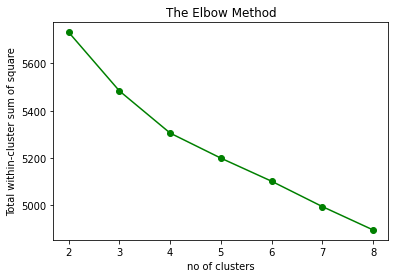

2 of KFold 10


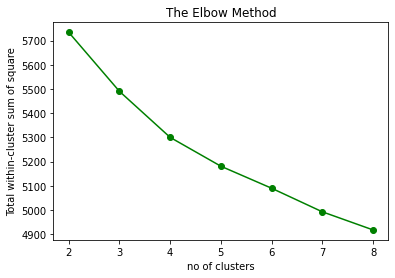

3 of KFold 10


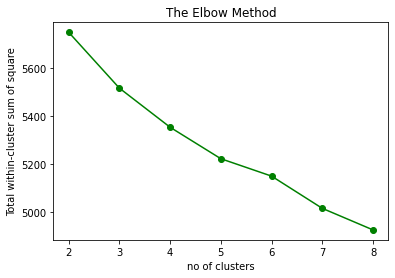

4 of KFold 10


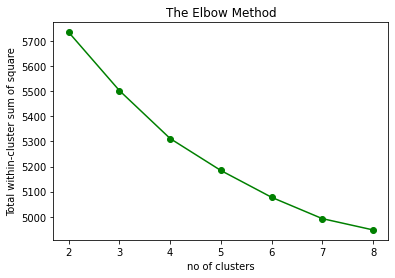

5 of KFold 10


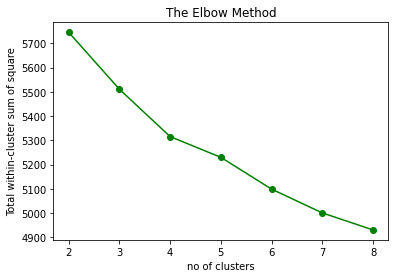

6 of KFold 10


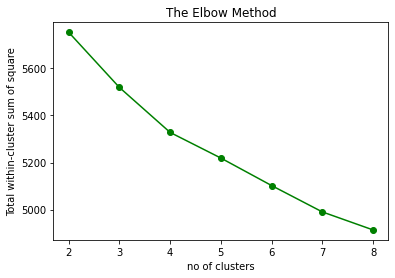

7 of KFold 10


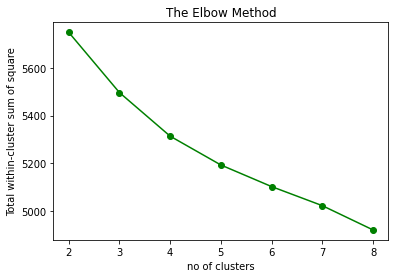

8 of KFold 10


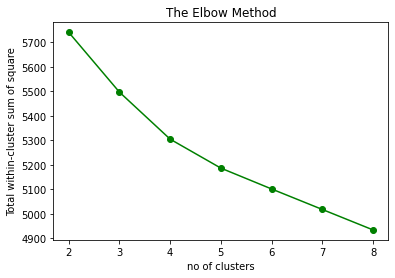

9 of KFold 10


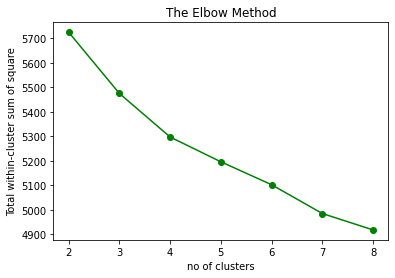

10 of KFold 10


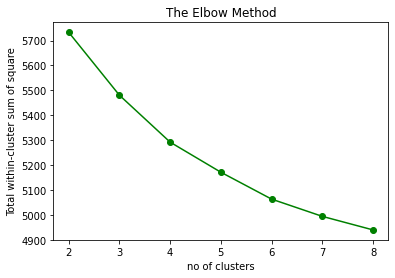

In [281]:
## Elbow method (K-mean method) (stratified cross-validation)
## Ref: https://www.kaggle.com/abhishekyadav5/kmeans-clustering-with-elbow-method-and-silhouette
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

Skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=49)
pred_test_full =0
cv_scoreDT =[]
i=1
for train_index,test_index in Skf.split(Titanic_X,Titanic_Y):
    print('{} of KFold {}'.format(i,Skf.n_splits))
    x_tr,x_v = Titanic_X[train_index],Titanic_X[test_index]
    y_tr,y_v = Titanic_Y[train_index],Titanic_Y[test_index]

    score = []
    for cluster in range(2,9):
        kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=49)
        kmeans.fit(x_tr)
        score.append(kmeans.inertia_)

    # plotting the score

    plt.plot(range(2,9), score, 'g-o')
    plt.title('The Elbow Method')
    plt.xlabel('no of clusters')
    plt.ylabel('Total within-cluster sum of square')
    plt.show()
    i+=1
    ## Total within-cluster sum of square: https://www.jamleecute.com/partitional-clustering-kmeans-kmedoid/
